**Описание проекта**

Необходимо осуществить маркетинговый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс. Для анализа использовались данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

Необходимо изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

**1.1 Импортируем необходимые библиотеки и прочитаем файлы csv. Датафреймы сохраним в переменных visits, orders и costs.**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

**1.2 Выведем на экран первые 10 строк датафреймов для ознакомления с данными.**

In [3]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [4]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [5]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


**1.3 Выведем основную информацию о датафрейме с помощью метода info().**

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**1.4 Скорректируем некоторые названия заголовков таблиц.**

In [9]:
visits = visits.rename(    #изменим стиль заголовков
    columns={
        'User Id': 'user_id',
        'Session Start': 'session_start',
        'Session End': 'session_end'
    }
)

In [10]:
orders = orders.rename(    
    columns={
        'User Id': 'user_id',
        'Event Dt': 'event_dt'
    }
)

In [11]:
visits.columns = visits.columns.str.lower() #приведем заголовки к нижнему регистру
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

**1.5 Преобразуем данные в нужный тип.**

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])  # преобразуем данные о времени
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**1.6 Проверим есть ли в таблицах дубликаты.**

In [13]:
visits.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

In [15]:
costs.duplicated().sum()

0

Итак, в ходе предобработки данных были скорректированы отдельные заголовки в датасетах, а также преобразован тип данных в столбцах, содержащих данные о времени. Пропусков и дубликатов в датасетах не выявлено. 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**2.1 Зададим функцию get_profiles().**

In [16]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**2.2 Зададим функцию get_retention().**

In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**2.3 Зададим функцию get_conversion().**

In [18]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**2.4 Зададим функцию get_ltv().**

In [19]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


**2.5 Зададим функцию filter_data().**

In [20]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**2.6 Зададим функцию plot_retention().**

In [21]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

**2.7 Зададим функцию plot_conversion().**

In [22]:
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 6))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**2.8 Зададим функцию plot_ltv_roi().**

In [23]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**3.1 Составим профили пользователей.**

In [24]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [25]:
profiles = profiles.sort_values(by='first_ts') #отсортируем профили пользователей по возрастанию даты привлечения
profiles.head(1) #выведем минимальную дату привлечения

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
57600,382394863972,2019-05-01 00:00:41,MediaTornado,Mac,United States,2019-05-01,2019-05-01,False,0.24


In [26]:
profiles.tail(1) #выведем максимальную дату привлечения

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
111023,739432831998,2019-10-27 23:59:04,TipTop,iPhone,United States,2019-10-27,2019-10-01,False,3.458824


Итак, первый пользователь был привлечен 1 мая 2019 года, последний - 27 октября 2019 года. Правда эти данные были указаны в описании проекта, но мы их перепроверили. 

**3.2 Выясним географию пользователей.**

In [27]:
profiles = get_profiles(visits, orders, costs)

print(
    profiles.groupby('region')
    .agg({'payer':'mean', 'user_id':'nunique'})
    .sort_values(by = 'payer', ascending = False)
)

                  payer  user_id
region                          
United States  0.069019   100002
Germany        0.041119    14981
UK             0.039829    17575
France         0.037994    17450


In [28]:
profiles = get_profiles(visits, orders, costs) #посчитаем общее количество привлеченных пользователей
print(profiles.agg({'user_id':'nunique'}))
    


user_id    150008
dtype: int64


Из таблицы видно, что большая часть платящих пользователей находится в США, меньше всего покупок в приложении совершают жители Франции. Общее количество пользователей распределилось аналогично: больше всего пользователей проживают в США (66,7%), меньше всего - во Франции. 

**3.3 Выясним какие устройства предпочитают пользователи.**

In [29]:
profiles = get_profiles(visits, orders, costs)
print(
    profiles.groupby('device')
    .agg({'user_id': 'nunique', 'payer':'mean'}) 
    .sort_values(by = 'user_id', ascending = False)
)

         user_id     payer
device                    
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468
Mac        30042  0.063644


Из таблицы видно, что пользователи заходят в приложение и с телефонов, и с компьютеров. При этом, большая часть пользователей являются владельцами iPhone. Покупки также чаще совершаются с Iphone.

Если говорить о пользователях, использующих компьютеры для работы с приложением, то их количество распределилось практически одинаково между PC и Mac. Но владельцы Mac чаще совершают покупки в приложении.

В целом можно сказать, что большую прибыль компании приносят пользователи-любители Apple. 

**3.4 Изучим каналы привлечения пользователей.**

In [30]:
profiles = get_profiles(visits, orders, costs)

print(
    profiles.groupby('channel')
    .agg({'user_id': 'nunique', 'payer':'mean'}) 
    .sort_values(by = 'user_id', ascending = False)
)

                    user_id     payer
channel                              
organic               56439  0.020553
FaceBoom              29144  0.122049
TipTop                19561  0.096007
OppleCreativeMedia     8605  0.027077
LeapBob                8553  0.030633
WahooNetBanner         8553  0.052964
RocketSuperAds         4448  0.079137
MediaTornado           4364  0.035747
YRabbit                4312  0.038265
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700


Больше всего пользователей приходят в приложение самостоятельно, но покупки совершают только 2% из них. Наиболее массовыми рекламными каналами привлечения являются FaceBoom и TipTop, доля платящих пользователей по ним одна из наиболее высоких. Также можно выделить AdNonSense и lambdaMediaAds. Несмотря на наименьшее среди остальных каналов количество пользователей, доля платящих клиентов здесь достаточно высокая.   

**3.5 Изучим как связаны страны и каналы привлечения пользователей.**

In [31]:
region_channels = (
    profiles[profiles['payer']==True].pivot_table(index='channel', 
                                              columns = 'region', 
                                              values = 'user_id', 
                                              aggfunc='count')
    .reset_index()
    .sort_values('United States')
    .query('channel != "organic"')
)
region_channels

region,channel,France,Germany,UK,United States
3,MediaTornado,NaN,NaN,NaN,156.0
8,YRabbit,NaN,NaN,NaN,165.0
5,RocketSuperAds,NaN,NaN,NaN,352.0
6,TipTop,NaN,NaN,NaN,1878.0
1,FaceBoom,NaN,NaN,NaN,3557.0
0,AdNonSense,150.0,142.0,148.0,NaN
2,LeapBob,90.0,69.0,103.0,NaN
4,OppleCreativeMedia,80.0,64.0,89.0,NaN
7,WahooNetBanner,152.0,148.0,153.0,NaN
9,lambdaMediaAds,82.0,67.0,76.0,NaN


Из таблицы видно, что рекламные каналы четко распределены между США и Европой. Два самых массовых рекламных канала TipTop и FaceBoom ориентированы на пользователей из США. 

Каналы AdNonSense и lambdaMediaAds, которые имеют наиболее высокую долю платящих пользователей, привлекают пользователей из стран Европы. 

**Вывод** 

Изучив профили пользователей, можно сказать, что большинство из них проживают на территории США (66,7%). Покупки в приложении также чаще всего делают американцы. Самым популярным гаджетом среди клиентов, в том числе совершающих покупки, является iPhone. Наиболее массовыми источниками привлечения новых пользователей стали платформы FaceBoom и TipTop, которые ориентированы на жителей США.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**4.1 Посчитаем общую сумму расходов на маркетинг.**

In [32]:
total_costs = costs['costs'].sum()
total_costs

105497.30000000002

Общая сумма расходов составляет 105 497,3

**4.2 Изучим, как траты распределены по рекламным источникам.**

In [33]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by = 'costs', ascending = False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Из таблицы видно, что большая часть рекламного бюджета расходуется на 2 основных источника: TipTop (51,9%) и FaceBoom (30,7%). 

**4.3 Построим визуализацию динамики изменения расходов по каждому рекламному источнику.**

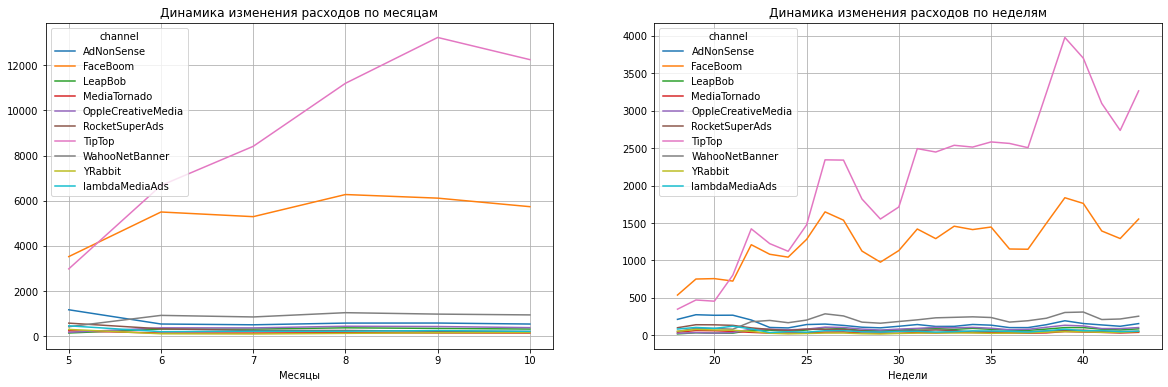

In [34]:
plt.figure(figsize = (20, 6))

costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week # получаем порядковый номер недели из даты
costs['month'] = pd.DatetimeIndex(costs['dt']).month # получаем порядковый номер месяца из даты
#формируем таблицу с группировкой расходов на маркетинг по месяцам и строим график
costs.pivot_table(index=['month'], values='costs', columns='channel', aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяцы')
#формируем таблицу с группировкой расходов на маркетинг по неделям и строим график
costs.pivot_table(index=['week'], values='costs', columns='channel', aggfunc='sum').plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Недели')

plt.show()

Из графика видно, что расходы на все рекламные каналы кроме TipTop и FaceBoom стабильны и не изменяются в течение всего исследуемого периода. При этом рекламный бюджет TipTop почти в 2 раза превышает бюджет FaceBoom и достигает своего пика в сентябре. Расходы на рекламу FaceBoom начинают снижаться после августа.     

**4.4 Посчитаем, сколько в среднем стоило привлечение одного пользователя.**

In [35]:
profiles_no = profiles.query('channel != "organic"') #исключим органических пользователей
profiles_no.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by = 'acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [36]:
profiles_no.agg({'acquisition_cost': 'mean'})  #рассчитаем средний CAC на одного пользователя для всего проекта

acquisition_cost    1.127481
dtype: float64

Самыми дорогими по стоимости привлечения 1 пользователя, ожидаемо, стали TipTop и FaceBoom (из проведенного ранее анализа видно, что расходы по этим рекламным каналам самые высокие). К тому же стоимость привлечения пользователя TipTop в 2,5 раза выше среднего САС, который составляет 1,1.

**Вывод** 

Общая сумма расходов составляет 105 497,3. Большая часть рекламного бюджета расходуется на 2 основных источника: TipTop (51,9%) и FaceBoom (30,7%). Расходы на все каналы кроме TipTop и FaceBoom стабильны и не изменяются в течение всего исследуемого периода. При этом рекламный бюджет TipTop почти в 2 раза превышает бюджет FaceBoom. Самыми дорогими по стоимости привлечения 1 пользователя являются TipTop и FaceBoom. К тому же стоимость привлечения пользователя TipTop в 2,5 раза выше среднего САС, который составляет 1,1. 

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [37]:
observation_date = datetime(2019, 11, 1).date()  # зададим момент анализа
horizon_days = 14  # зададим горизонт анализа 

Исключим из анализа органических пользователей, так как они пришли в приложение самостоятельно без использования рекламы.

**5.1 Проанализируем окупаемость рекламы.**

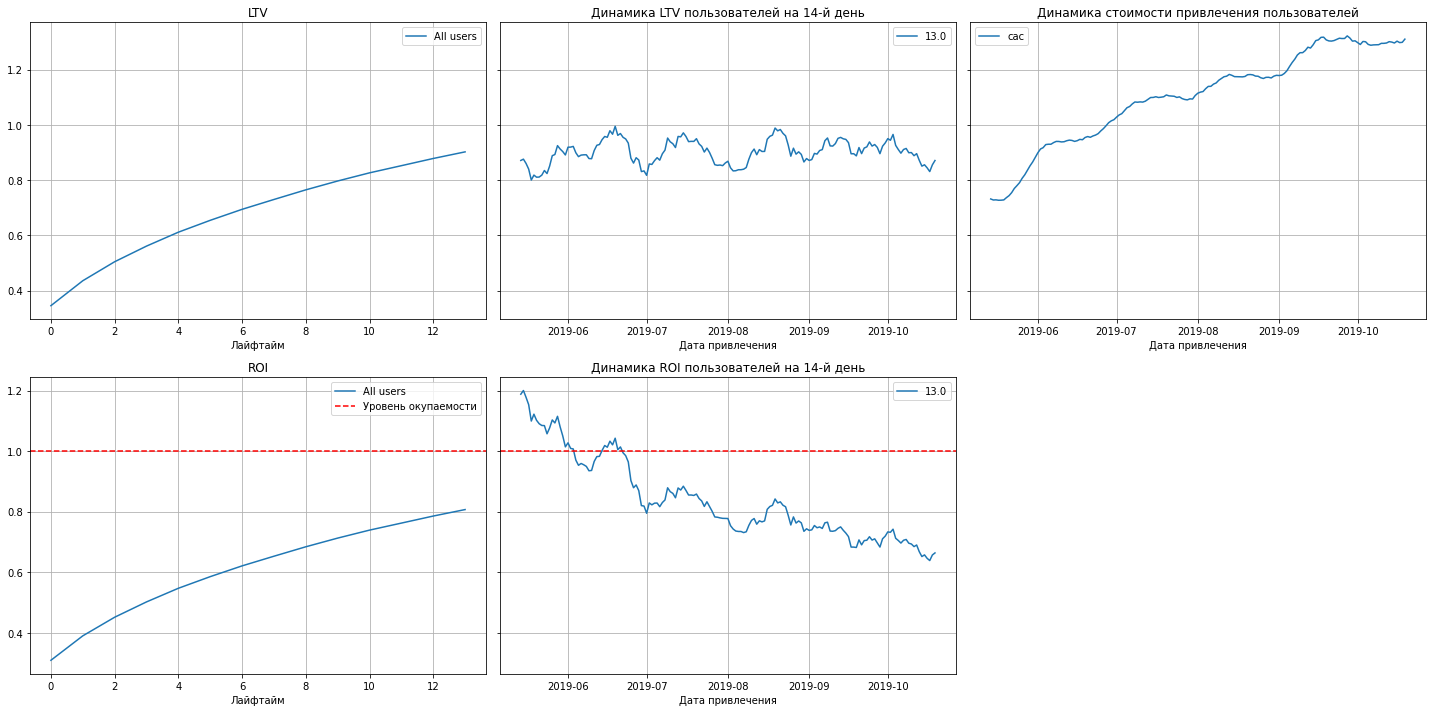

In [38]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать следующие выводы:
- LTV показывает положительную динамику, значит в целом выручка приложения растет. 
- Реклама не окупается. ROI к концу второй недели так и не достиг 100%.
- Динамика ROI также демонстрирует отрицательную тенденцию. После июня реклама перестала окупаться.
- CAC показывает постоянный рост. Рекламные бюджеты увеличивались на протяжении всего анализируемого периода.

**5.2 Проанализируем конверсию и удержание пользователей.**

Построим графики конверсии и удержания в целом по приложению.

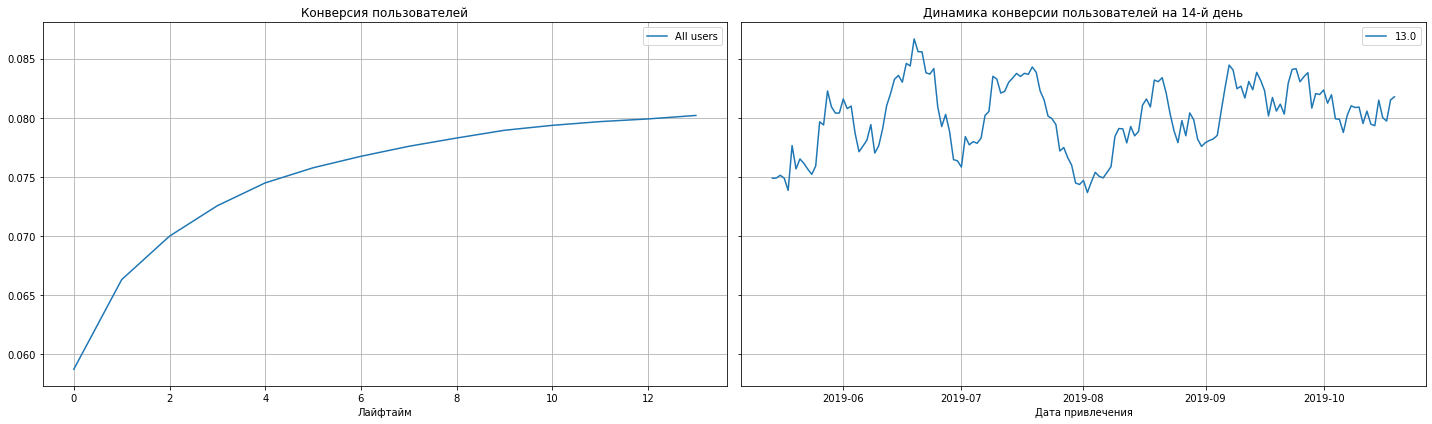

In [39]:
# смотрим конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

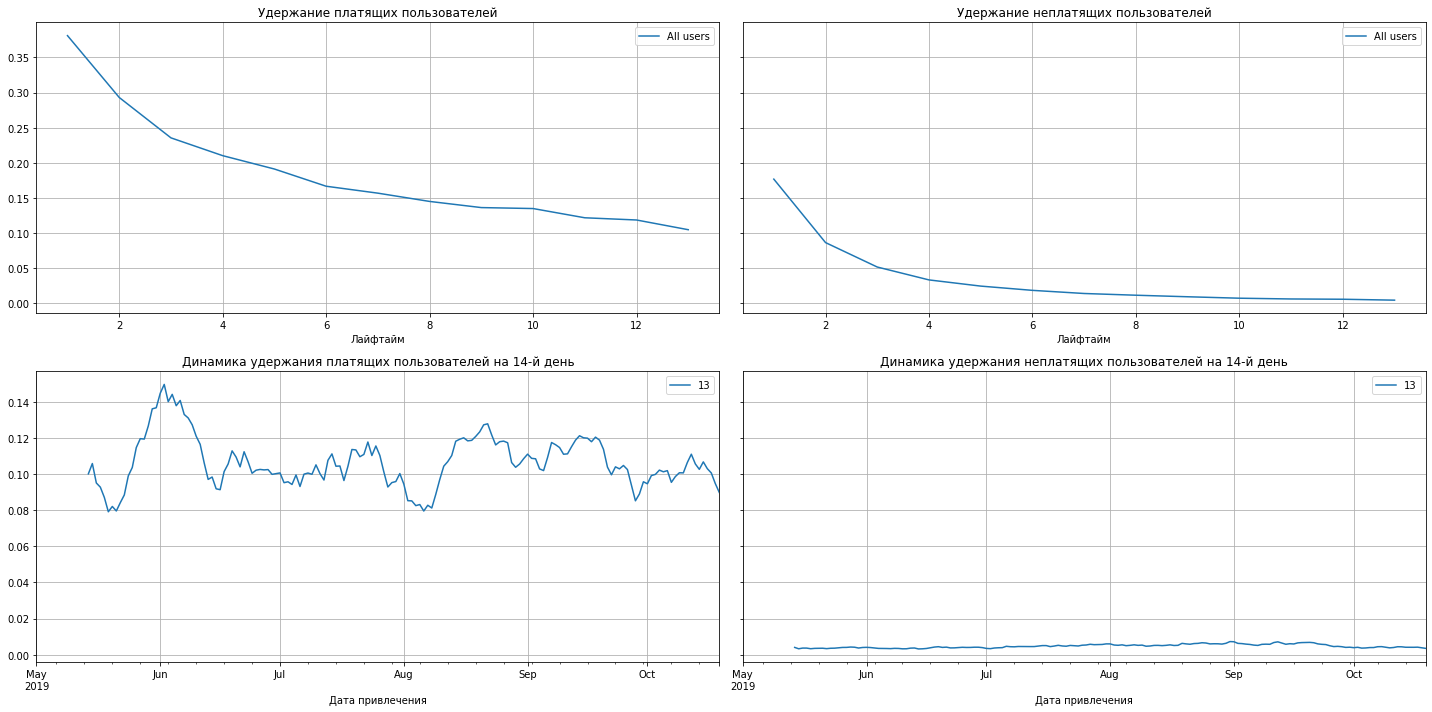

In [40]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Из графиков видно, что общая конверсия пользователей приложения имеет положительную динамику. Однако, удержание привлеченных пользователей (как платящих, так и неплатящих) снижается к концу второй недели. 

Рассмотрим показатели конверсии и удержания в разрезе региона проживания, канала привлечения и устройства, с которого происходит взаимодействие с приложением.

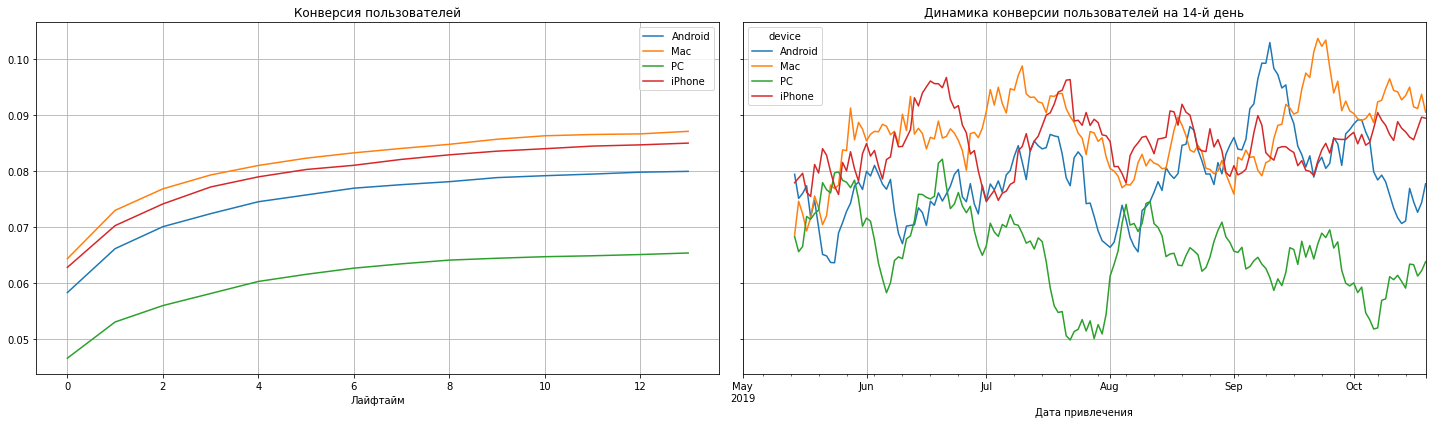

In [41]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

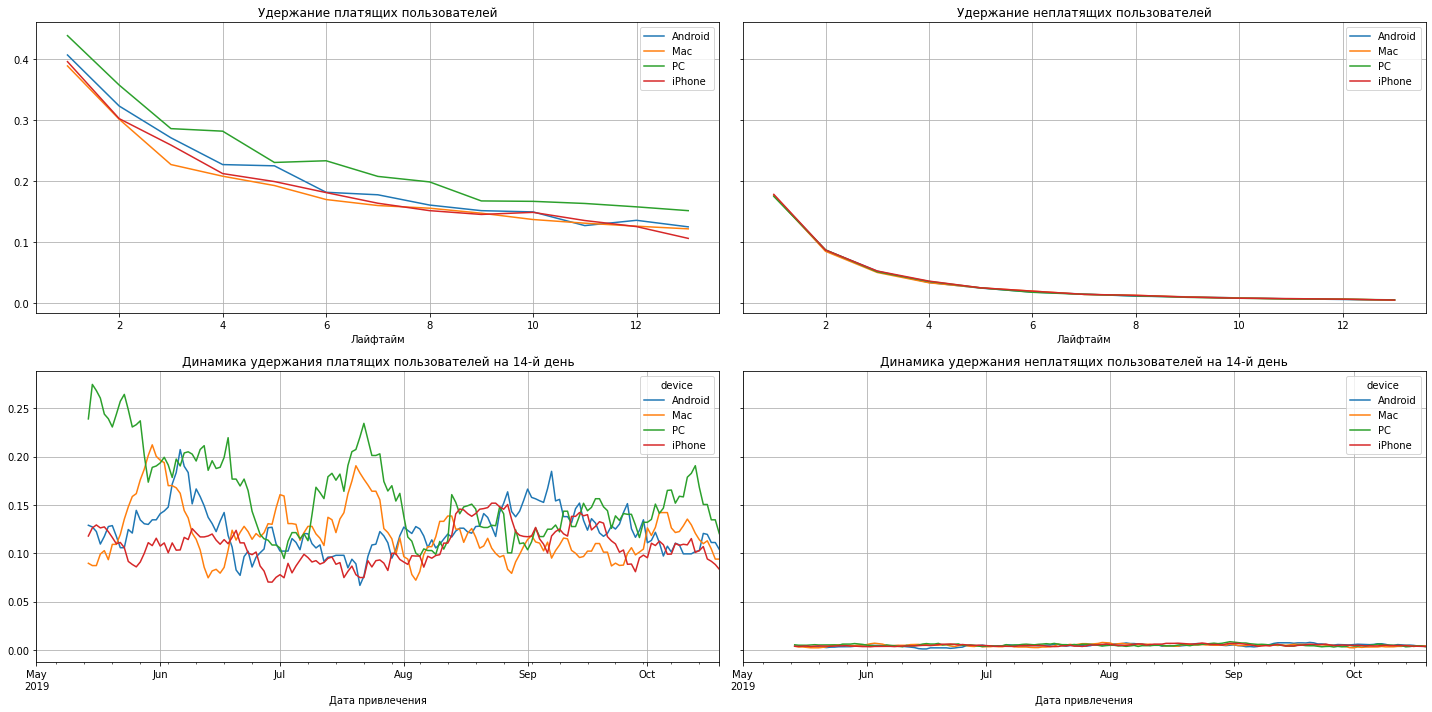

In [42]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия пользователей растет, однако, удерживаются они плохо. Исходя из графиков, лучше всего конвертируются пользователи Мас, хуже всего - пользователи РС. При этом лучше удерживаются, наоборот, пользователи РС, хуже - Мас.

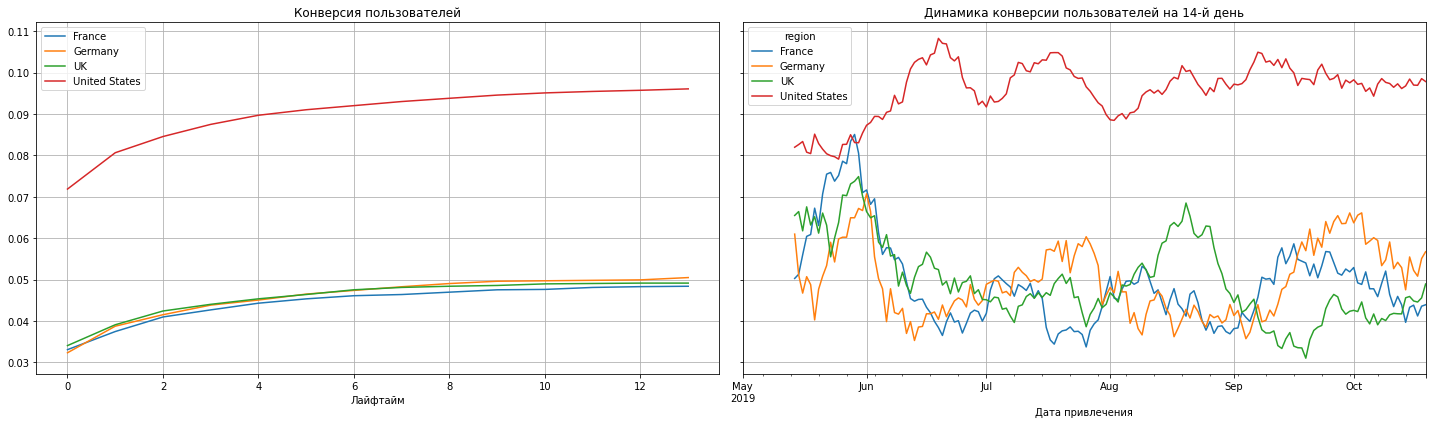

In [43]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

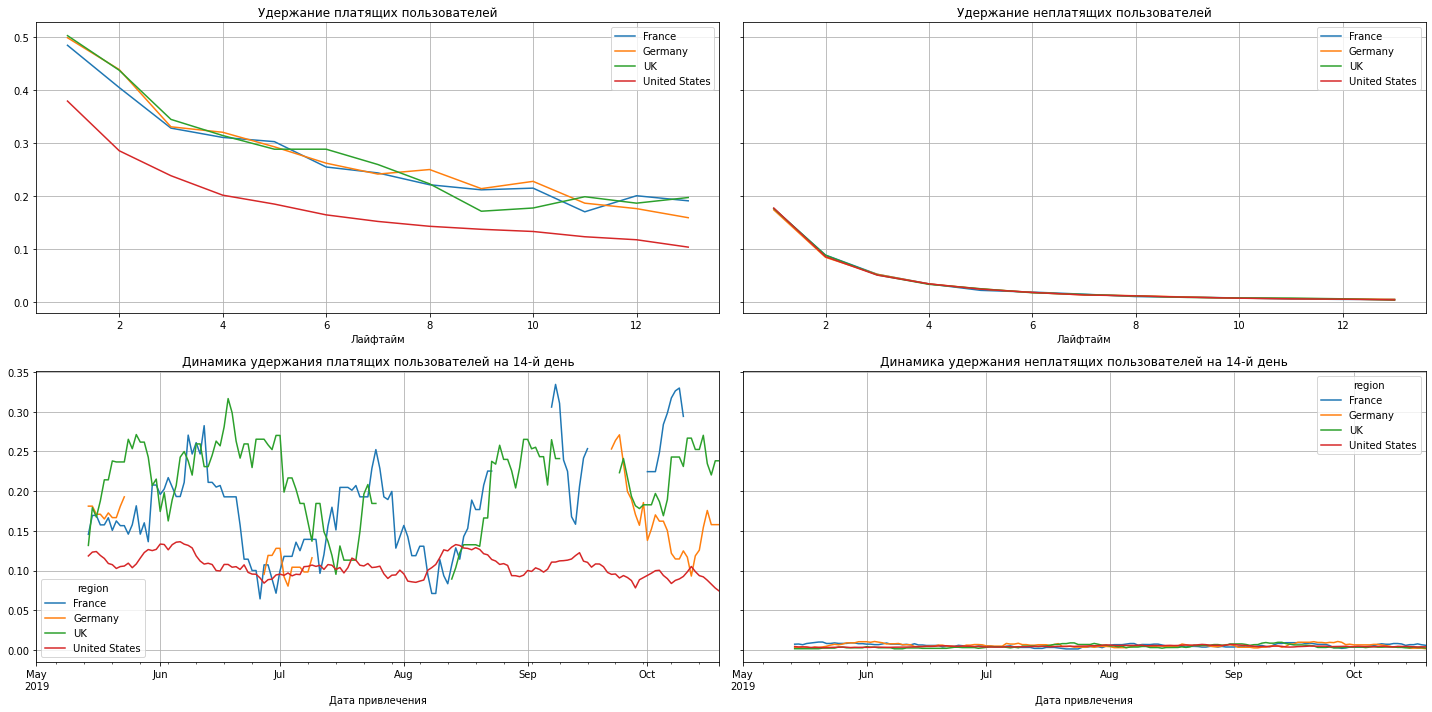

In [44]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Конверсия пользователей и США значительно выше конверсии пользователей из Европы. При этом жители США удерживаются в приложении хуже, чем пользователи остальных стран. 

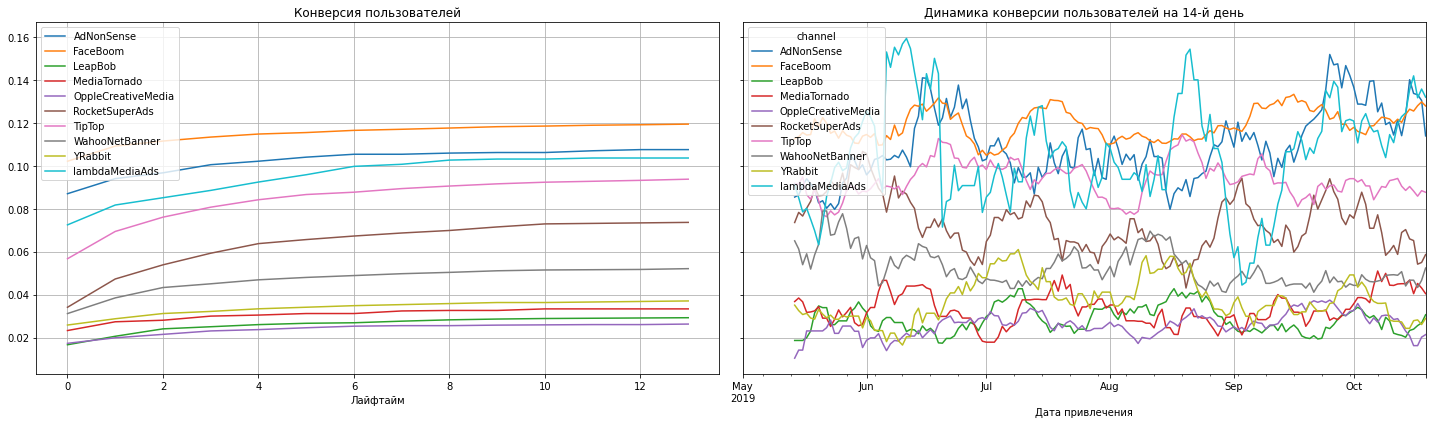

In [45]:
# смотрим конверсию с разбивкой по рекламным каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

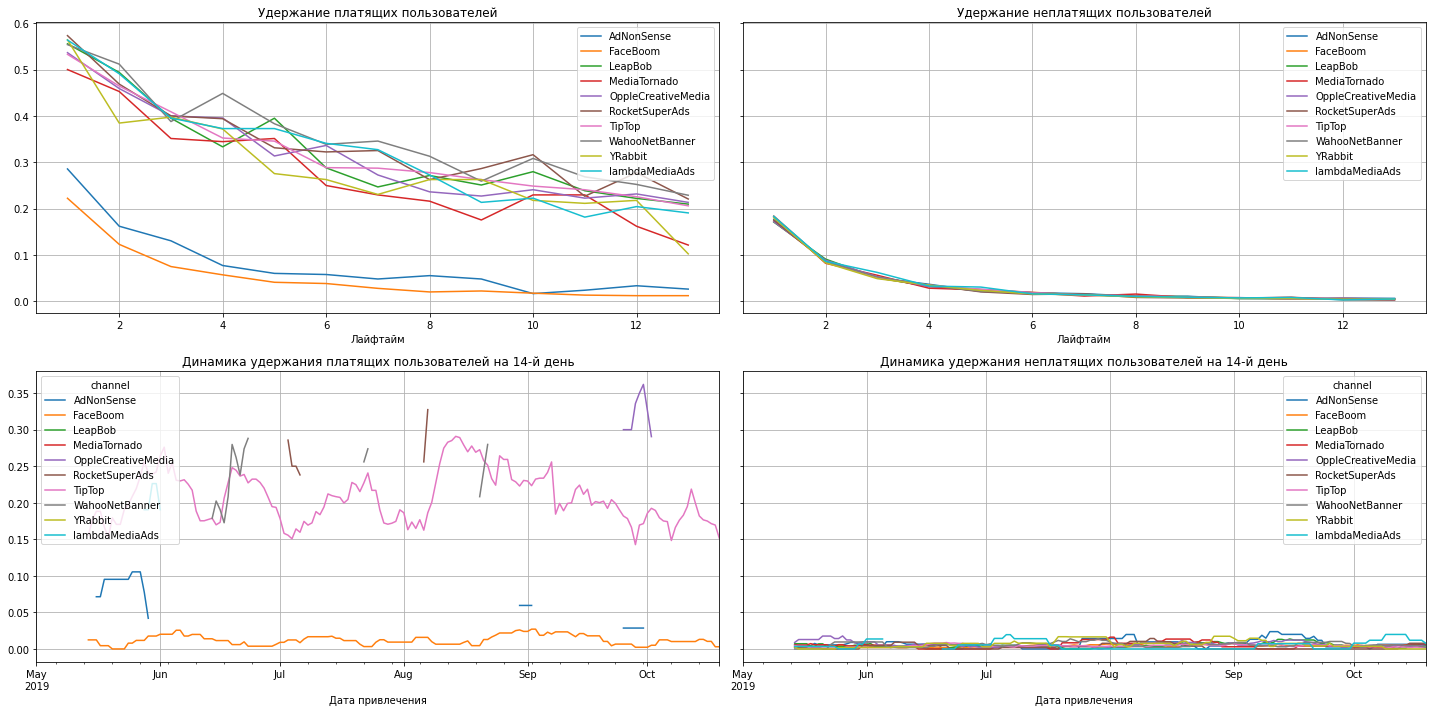

In [46]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Лучшую конверсию демонстрируют пользователи, пришедшие из FaceBoom, при этом их удержание к концу второй недели стремится к нулю. Также можно выделить еще один канал с плохим удержанием - AdNonSense.

**5.3 Проанализируем окупаемость рекламы с разбивкой по устройствам.**

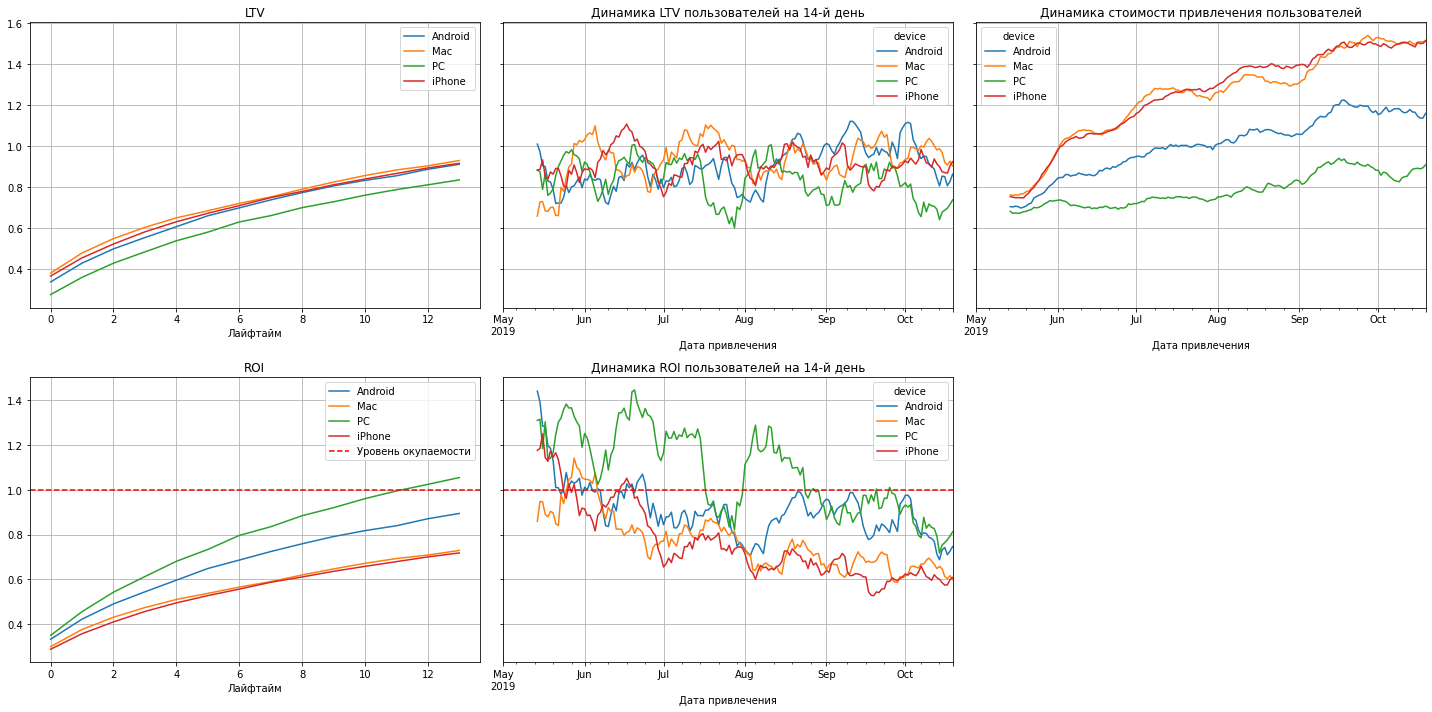

In [47]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно сделать следующие выводы:
- Самый высокий LTV — у пользователей Мас и iPhone, наименьший - у пользователей РС.
- LTV подвержен сезонности, но стабилен.
- Реклама окупается только у пользователей РС. Для пользователей Мас, iPhone и Android реклама не окупается.
- Стоимость привлечения пользователей показывает рост. При этом наибольшее значение САС у пользователей Мас и iPhone, наименьшее - у пользователей РС.

**5.4 Проанализируем окупаемость рекламы с разбивкой по странам.**

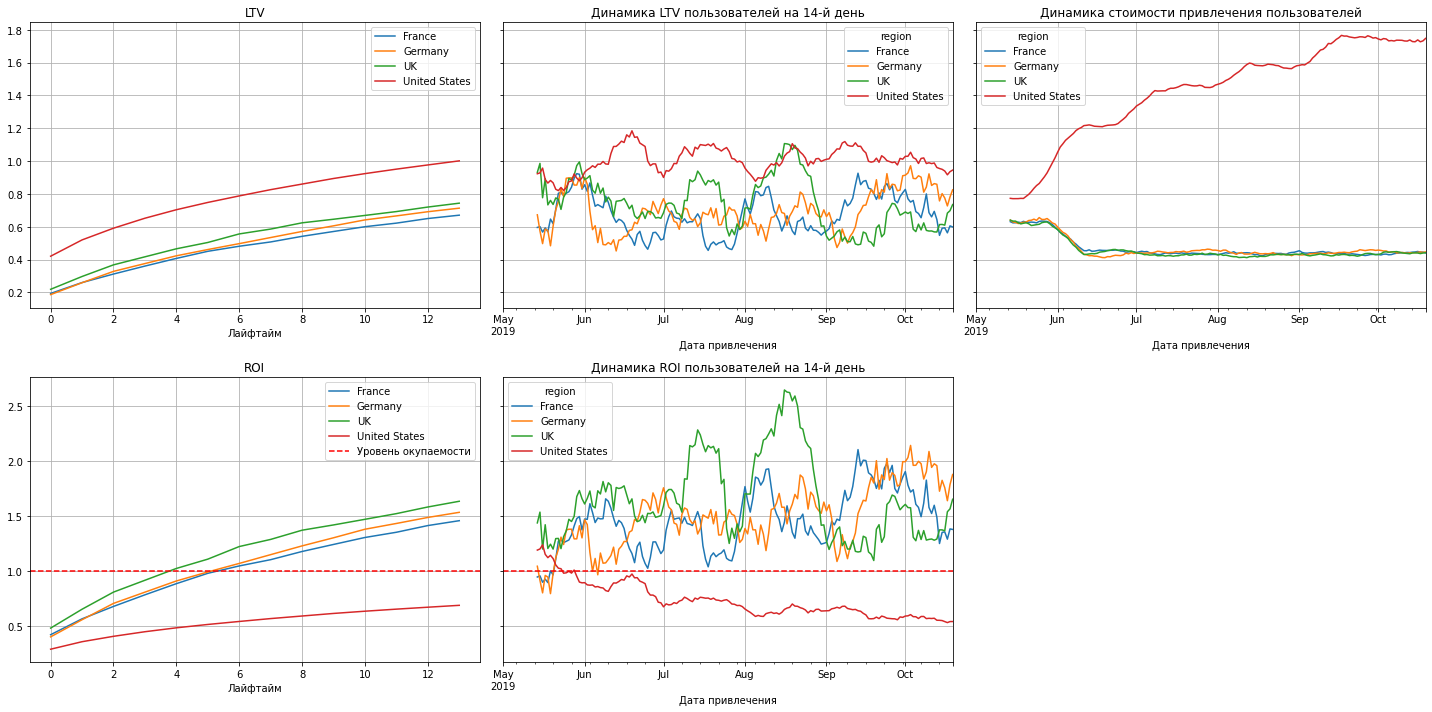

In [48]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно сделать следующие выводы:
- Самый высокий LTV — у пользователей из США. Затем идут Германия и Великобритания. Пользователи из Франции приносят приложению меньше всего выручки.
- LTV подвержен сезонности, но стабилен.
- В странах Европы реклама окупается уже на 2-4 день привлечения пользователей. А вот для пользователей из США реклама не окупается совсем.
- Стоимость привлечения пользователей в странах Европы стабильна и находится практически на одном уровне, в США бюджеты на рекламу постоянно увеличиваются и стоимость привлеченияи соответственно растет.

**Проанализируем окупаемость рекламы в США.**

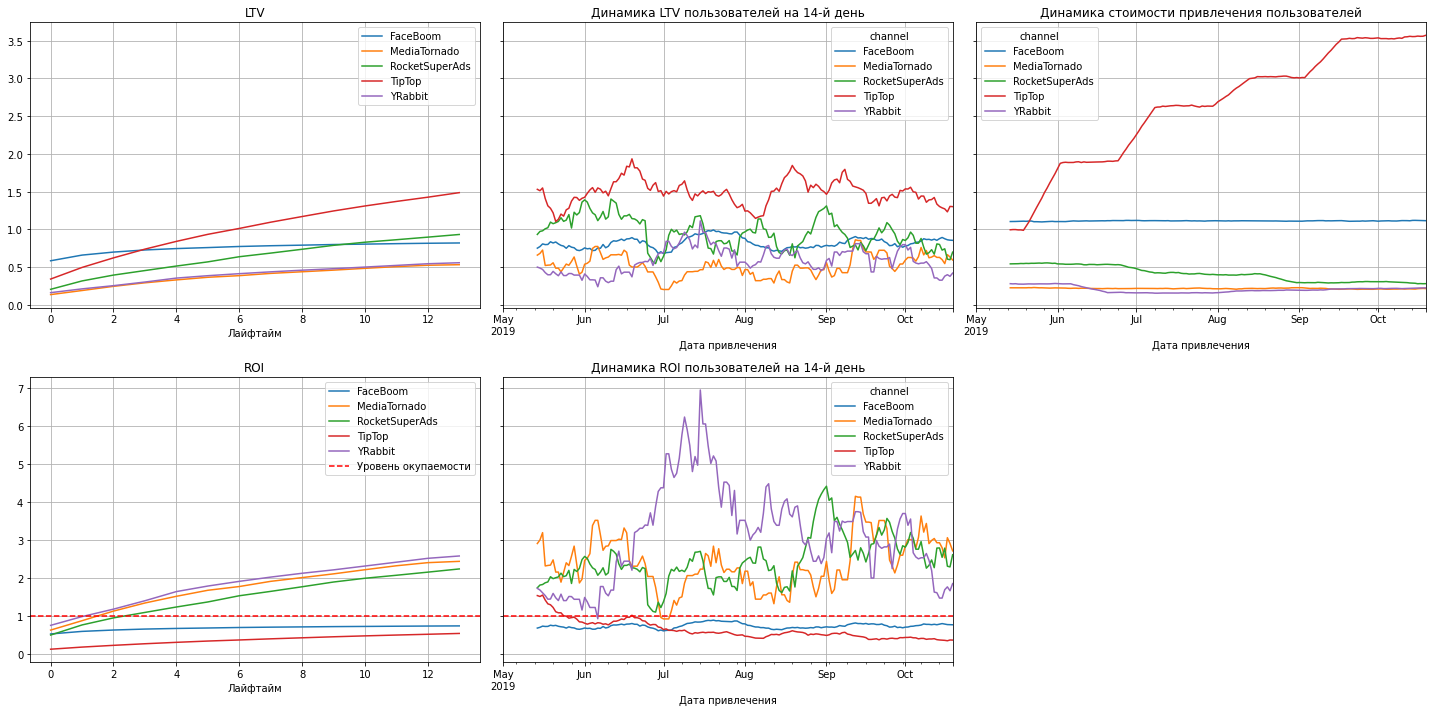

In [49]:
dimensions = ['channel'] 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно сделать следующие выводы:
- Самый высокий LTV у канала TipTop, затем идут RocketSuperAds и FaceBoom, YRabbit и MediaTornado приносят приложению меньше всего выручки.
- Со 2 дня все рекламные каналы, кроме TipTop и FaceBoom, начинают окупаться.
- Стоимость привлечения пользователей во всех каналах, кроме TipTop, стабильна и находится практически на одном уровне. У TipTop стоимость привлечения пользователей постоянно растет.

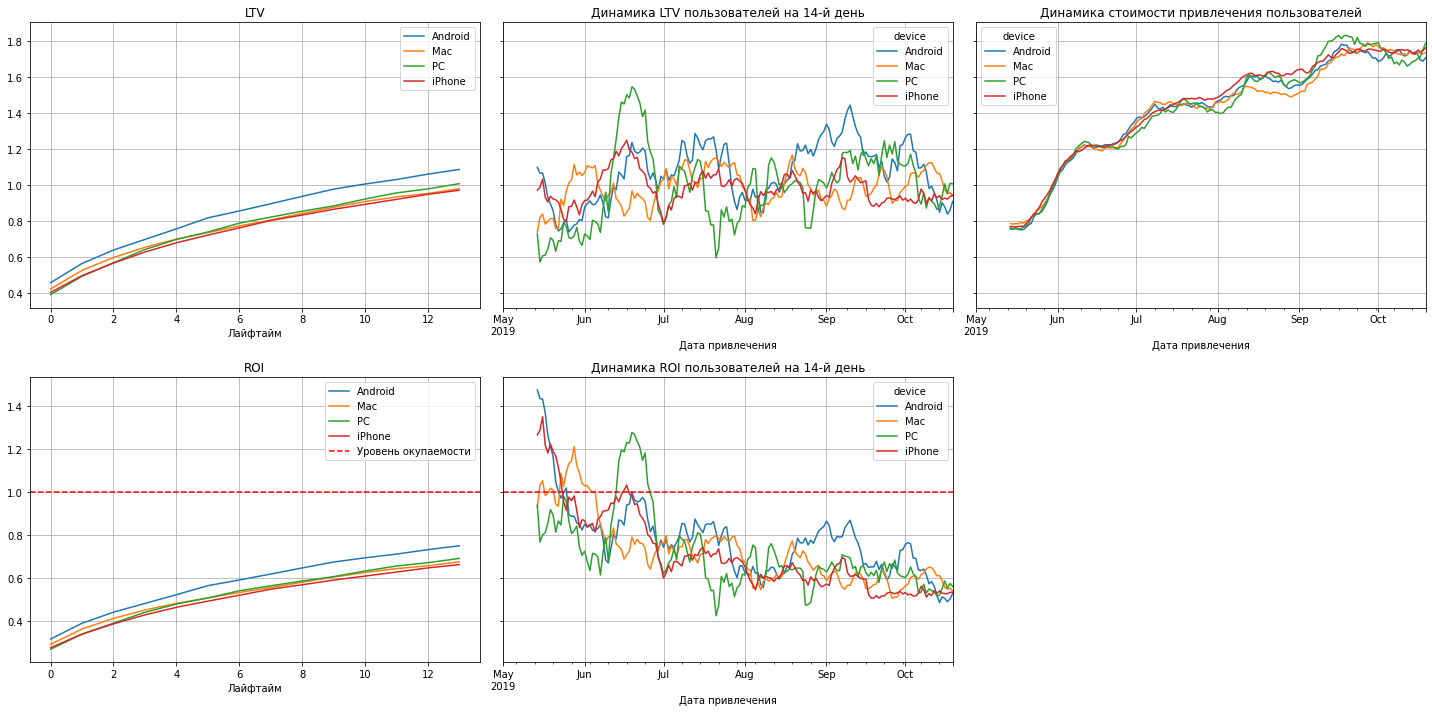

In [50]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам можно сделать следующие выводы:
- Самый высокий LTV — у пользователей Android, LTV по остальным устройствам находится на одном уровне.
- Реклама не окупается для пользователей всех видов устройств.
- Стоимость привлечения пользователей всех видов устройств показывает рост.

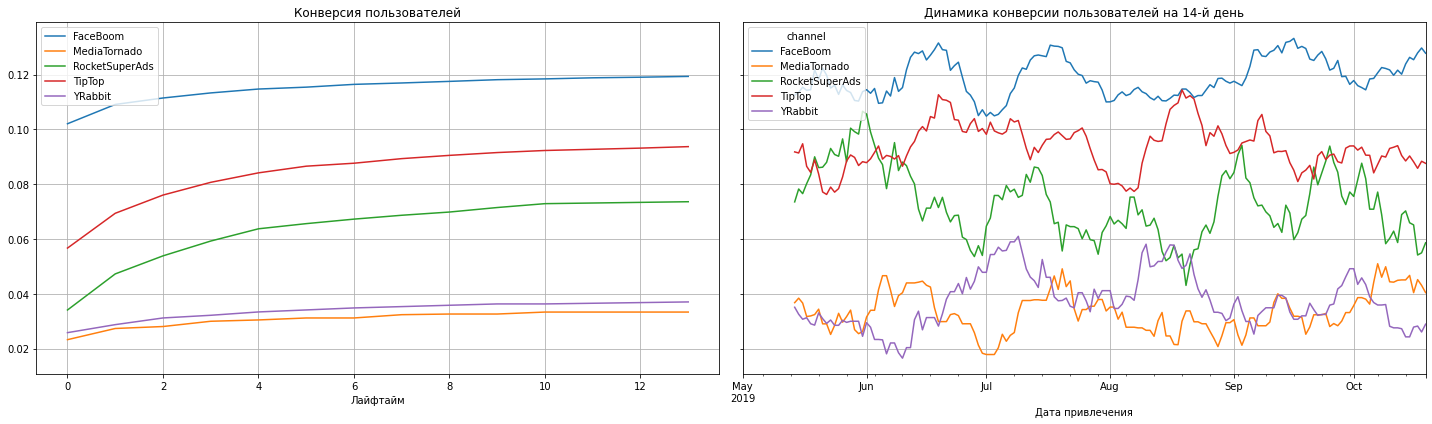

In [51]:
dimensions = ['channel'] # смотрим конверсию с разбивкой по рекламным каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Наиболее высокая конверсия у канала FaceBoom, средние значения - у TipTop и RocketSuperAds, хуже всего конвертируются пользователи из YRabbit и MediaTornado.

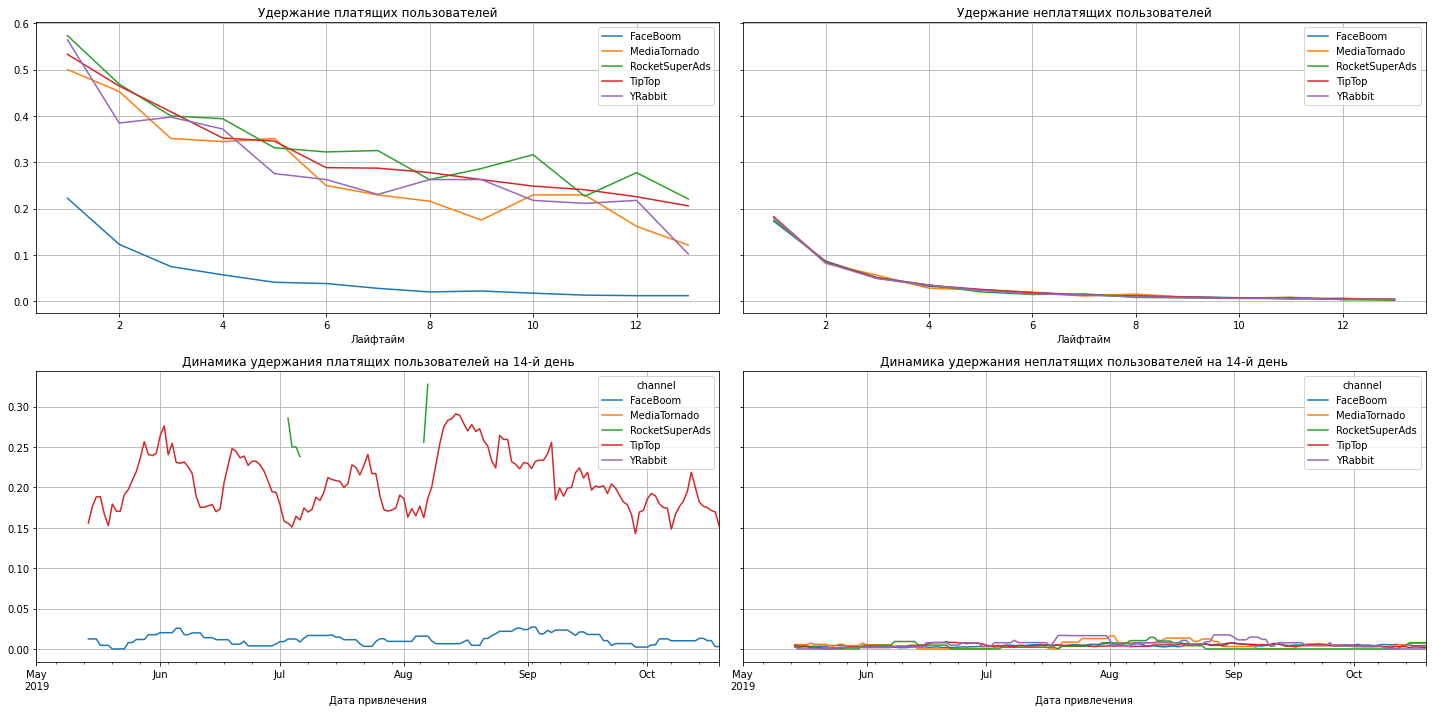

In [52]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Самое низкое удержание пользователей в приложении FaceBoom, пользователи в других приложениях удерживаются примерно одинаково.

**5.5 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.**

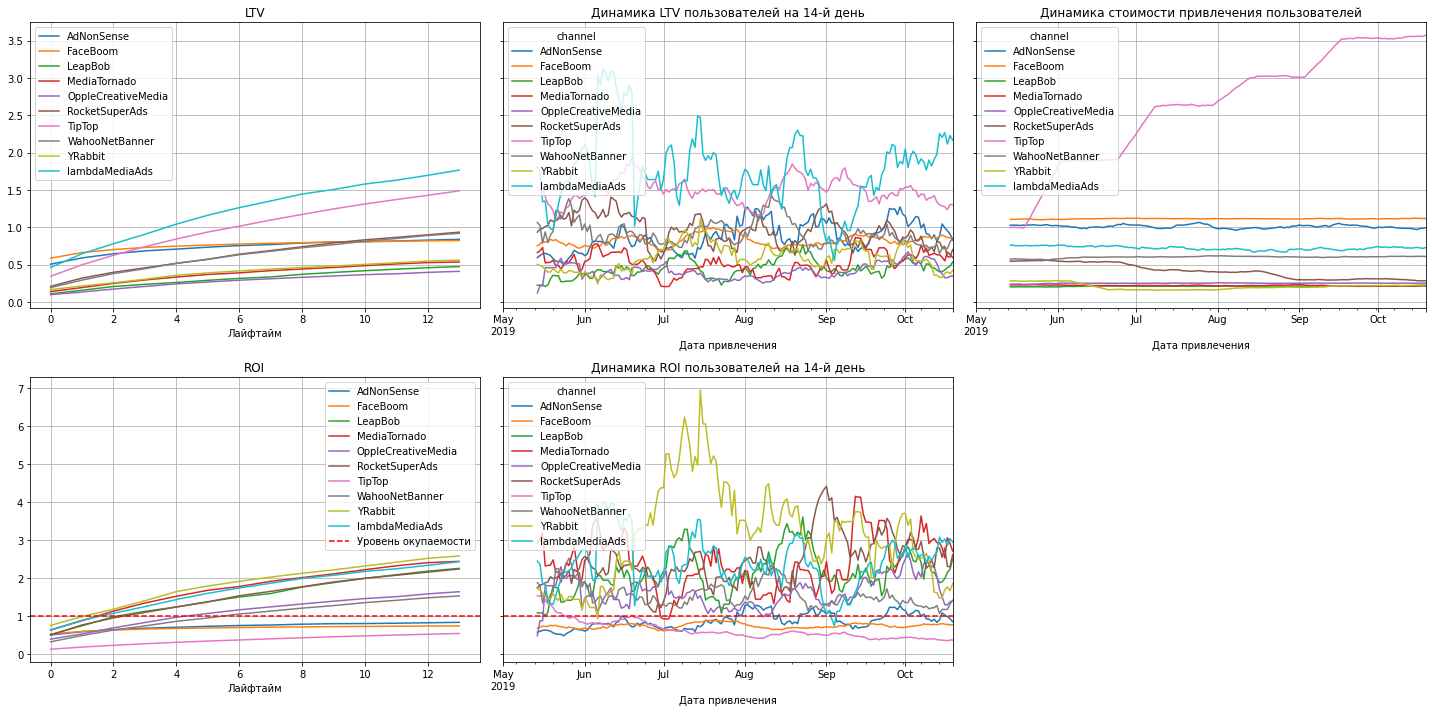

In [53]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


По графикам можно сделать следующие выводы:
- Самый высокий LTV — у пользователей, привлеченных из lambdaMediaAd. Меньше всего выручки приносят органические пользователи и пользователи, пришедшие из OppleCreativeMedia.
- LTV также подвержен сезонности, но при этом стабилен.
- Почти все рекламные каналы окупаются на 1-6 день привлечения пользователей. Исключение составляют TipTop, FaceBoom, AdNoneSence.
- По всем рекламным каналам кроме TipTop стоимость привлечения пользователей стабильна. 

Для того, чтобы сделать окончательный вывод, необходимо ответить на следующие вопросы: 
- Окупается ли реклама, направленная на привлечение пользователей в целом?

Реклама не окупается. ROI к концу второй недели так и не достиг 100%.
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Негативное влияние на окупаемость рекламы оказывают пользователи из США, а также пользователи, использующие для работы с приложением Мас и iPhone. Если говорить о рекламных каналах, то здесь не окупаются пользователи, привлеченные из TipTop, FaceBoom и AdNoneSence.  
- Чем могут быть вызваны проблемы окупаемости?

Проблемы с окупаемостью могут быть связаны со слишком высокой стоимостью рекламы для привлечения пользователей из США. Более 80 % рекламных расходов приходится на платформы TipTop (51,9%) и FaceBoom (30,7%), которые ориентированы на пользователей из США. Например, TipTop, на который уходит половина рекламного бюджета показывает не самую высокую конверсию и среднее удержание, реклама из этого канала не окупается, а стоимость привлечения пользователей постоянно растет. FaceBoom не смотря на самую высокую конверсию из всех каналов, хуже всего удерживает пользователей, реклама также не окупается.   

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В ходе проведенного маркетингового анализа приложения Procrastinate Pro+ были выявлены причины неэффективности привлечения пользователей. Расходы на рекламу анализировались в разрезе 3 признаков: по устройству, которое используется для взаимодействия с приложением, по региону проживания пользователей, по каналу привлечения пользователей. 

1. Если рассматривать основные причины низкой окупаемости рекламы в зависимости от девайса пользователя (Мас/iPhone/РС/Android ), то можно выделить следующие:
- Конверсия пользователей, использующих для работы с приложением РС достаточно низкая, соответственно значение LTV для РС также самое низкое из всех устройств.
- Для пользователей Мас, iPhone и Android реклама не окупается.
- Стоимость привлечения 1 пользователя (САС) для Мас и iPhone значительно превышает САС по остальным устройствам.

2. Причины низкой окупаемости рекламы в зависимости от региона проживания пользователей (США/Великобритания/Германия/Франция):
- Удержание пользователей из США самое низкое из всех рассматриваемых стран.
- Реклама для пользователей из США не окупается.
- Объем рекламных расходов для пользователей из США в разы превышает расходы на рекламу в других регионах, при этом постоянно растет.

3. Причины низкой окупаемости рекламы в зависимости от канала привлечения пользователей:
- Высокая стоимость привлечения пользователей в 2 основных каналах (TipTop и FaceBoom), на которые уходит большая часть рекламного бюджета. Стоимость привлечения 1 пользователя в TipTop в 2,5 раза выше среднего САС.
- Реклама в TipTop, FaceBoom и AdNoneSence не окупается. <ins>Реклама канала TipTop не окупается из-за высокой стоимости привлечения пользователей. Реклама каналов FaceBoom и AdNoneSence не окупается по причине низкого удержания пользователей на каналах.</ins>

Основной причиной неэффективности привлечения пользователей можно назвать неверное распределение рекламного бюджета между выбранными рекламными платформами.

Из проведенного анализа видно, что рекламные каналы четко распределены между регионами проживания привлекаемых пользователей (США и страны Европы) и не пересекаются между собой. В США окупаются 3 из 5 рекламных каналов, в Европе - 4 из 5. При этом большая часть общего рекламного бюджета (более 80%) уходит на оплату 2 американских каналов (TipTop и FaceBoom), которые не окупаются.

Если отдельно рассмотреть причины низкой окупаемости рекламы в США, то можно сделать следующие выводы:
- Пользователи из каналов YRabbit и MediaTornado конвертируются хуже всего, самое низкое удержание у пользователей из FaceBoom.
- Самый низкий LTV у каналов YRabbit и MediaTornado, они приносят приложению меньше всего выручки. 
- Реклама в TipTop и FaceBoom не окупается.
- У TipTop стоимость привлечения пользователей постоянно растет.
- Реклама для пользователей всех видов устройств не окупается.


Отделу маркетинга стоит выполнить следующие рекомендации:
- Перераспределить рекламные бюджеты на каналы с более высокой окупаемостью. Например, на RocketSuperAds в США и lambdaMediaAds в Европе. Эти каналы имеют высокую долю платящих пользователей и низкую стоимость их привлечения.
- Расширить долю влияния на европейский рынок. Пользователи из Европы достаточно хорошо конвертируются, показывают хорошее удержание, а реклама из европейских каналов окупается.
- Оценить услуги/продукт, который представлен на американском рынке. Возможно, наш продукт просто неинтересен американским пользователям. Учитывая высокую покупательскую способность пользователей из США, важно подобрать продукт (возможно выпустить новый), который будет интересен американцам.
- Оценить по каким признакам формируется таргетированная реклама в самых массовых каналах привлечения (TipTop и FaceBoom). Возможно, из этих каналов приходит нецелевая аудитория.